In [2]:
from IPython.display import Image

# 데이터 세계란?

- 데이터 분석가 
- 데이터 엔지니어

# 제가 생각하는 데이터 분석가란?
- 데이터를 가지고 자신이 자신있는 툴을 이용하여 이야기를 만드는 이야기 쟁이
    - 툴 : excel, python, R, julia, javascript, tableau .. 등등

## 데이터로 만드는 이야기란?

- 당연한 사실로 부터 시작하여서 남들이 미쳐 보지 못했던 이야기들을 데이터 기반으로 할 수있는 능력
- 통계적으로 정확하게 기승전결을 정리할수 있다면 더욱 더 좋음
- 데이터를 기반으로 새로운 시각으로 데이터를 정리하는 창의력은 휼륭한 무기
- 시각적으로 필요한 정보를 적제 적소에 전달하는 능력이 필요

- 예시 : https://support.heartcount.io/community/learning/play1

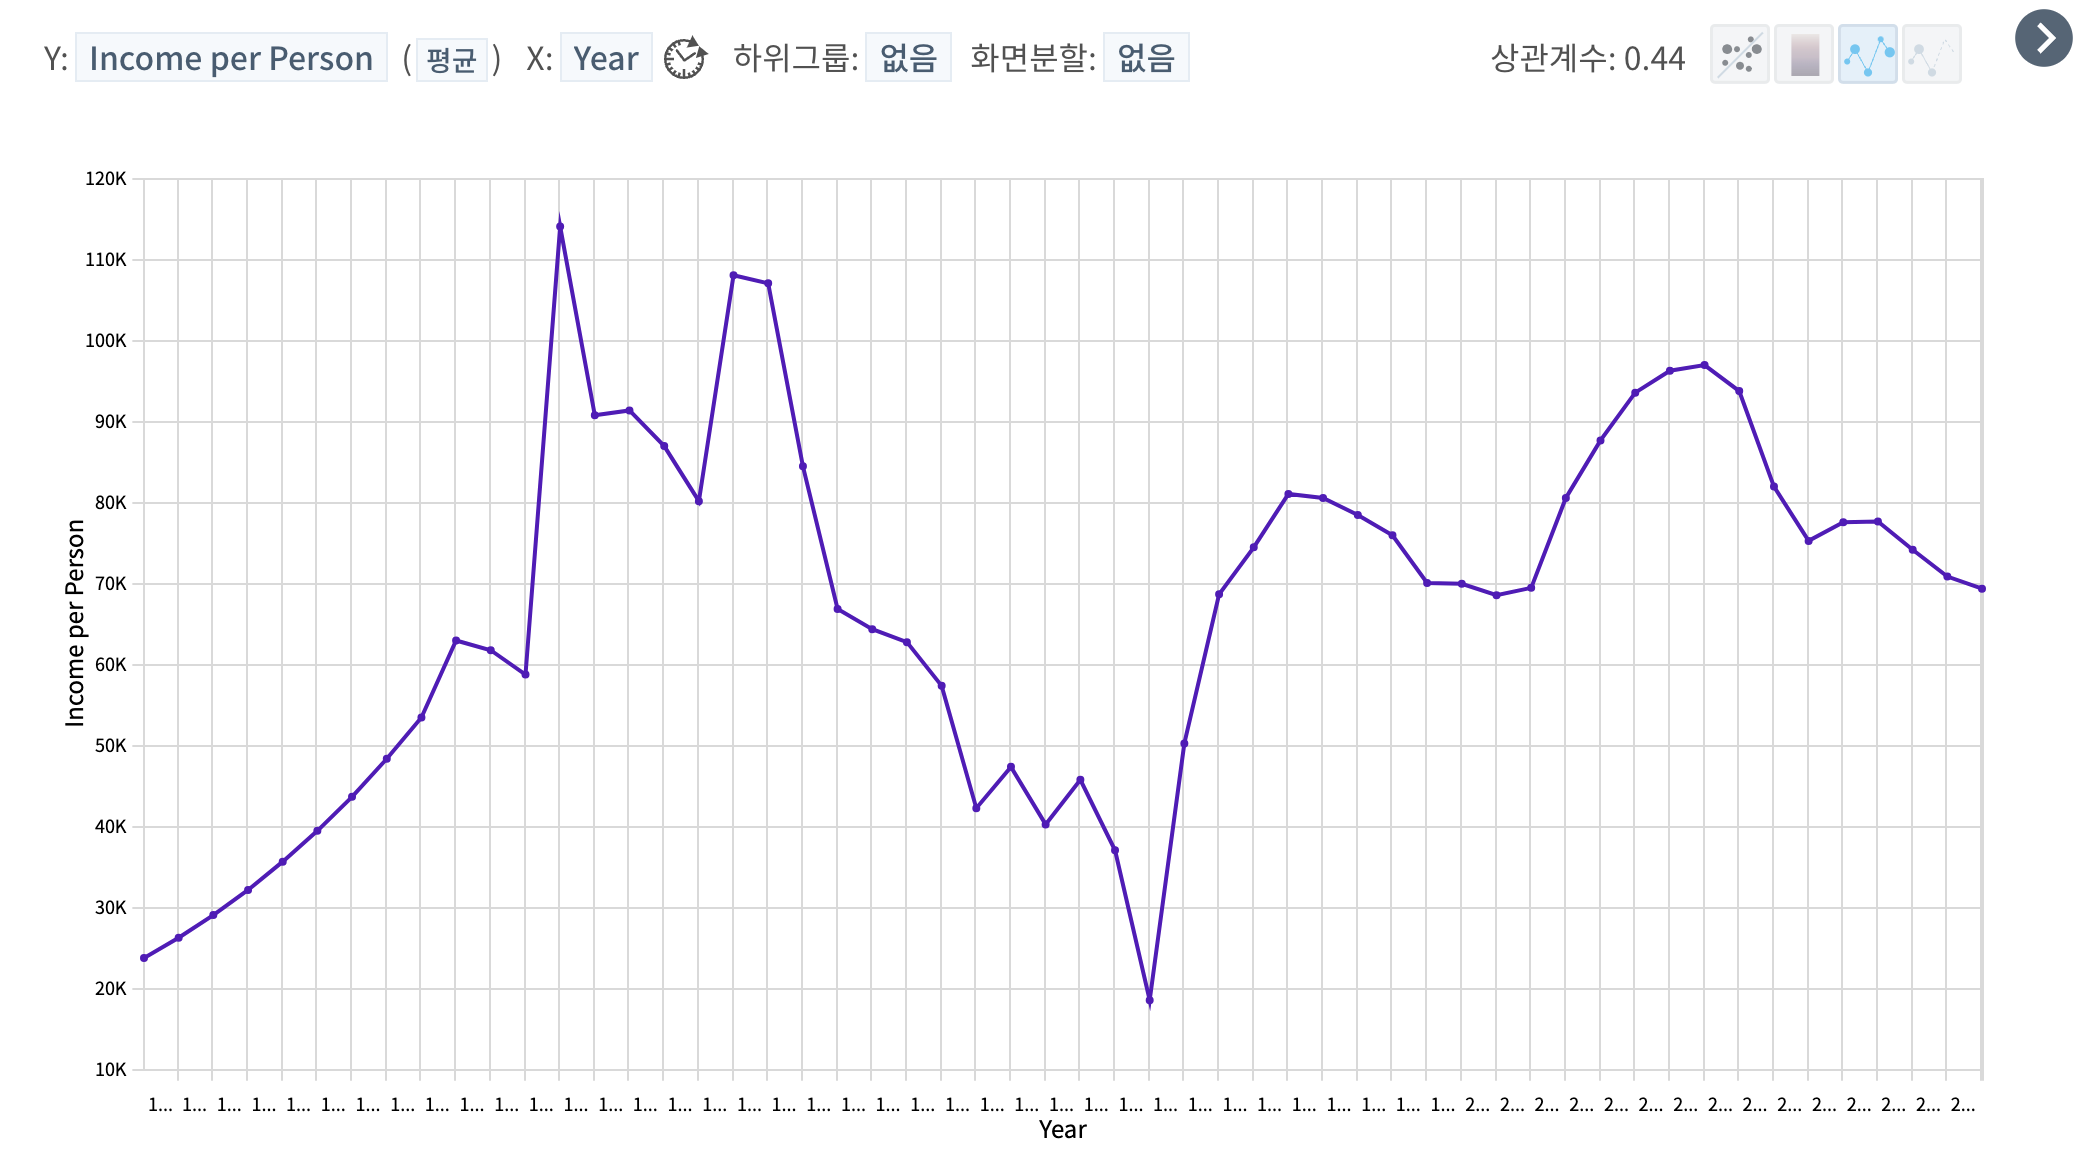

In [4]:
Image('./image/story_tell.png')
# 쿠웨이트 수입 통계 

### 재미난 이야기를 만드는것은 많은 데이터를 보는 노력과, 통계 공부로 이뤄짐
- 이야기를 만드는 것 만큼 중요한 이야기 


# 시각화 하여서 사람들에게 보여주는 능력
- streamlit, pythonic 하면서 사람들에게 쉽고 빠르게 정보 전달 가능
- https://streamlit.io/gallery

```
# 정말 간단하게 만드는 코인 정보 수집기 
- https://docs.streamlit.io/library/api-reference 

!pip install streamlit
!pip install cryptocmd
!pip install plotly

import streamlit as st
from cryptocmd import CmcScraper
import plotly.express as px
from datetime import datetime

st.write('# Cryptocurrency Web App')

st.sidebar.header('Menu')

name = st.sidebar.selectbox('Name', ['BTC', 'ETH', 'USDT'])

start_date = st.sidebar.date_input('Start date', datetime(2021, 1, 1))
end_date = st.sidebar.date_input('End date', datetime(2021, 1, 7))

# https://coinmarketcap.com
scraper = CmcScraper(name, start_date.strftime('%d-%m-%Y'), end_date.strftime('%d-%m-%Y')) # '%d-%m-%Y'
df = scraper.get_dataframe()
st.download_button(label='Download CSV', data=df.to_csv().encode('utf-8'), file_name='data.csv', mime='text/csv')

fig_close = px.line(df, x='Date', y=['Open', 'High', 'Low', 'Close'], title='Price')
fig_volume = px.line(df, x='Date', y=['Volume'], title='Volume')

st.plotly_chart(fig_close)
st.plotly_chart(fig_volume)

# 실행 방법 streamlit run main.py
```

# 추가적으로 가볍게 배워 볼만 한것 
- docker : 나의 streamlit을 도커라이징하자 
- 배포 작업 : https://docs.streamlit.io/streamlit-cloud/get-started

---
(이상의 영역)
- fastapi : api기반으로 조금 더 복잡하고 멋진 어플 만들어보자
- mysql/mongodb : 데이터도 저장해보고 불러서 해보는 멋진 어플 만들자

# 

# 제가 생각하는 데이터 엔지니어란?
- 원하는 데이터를 가지고 효율적으로 처리하여서 시스템에 도움이 되는 사람들
- 정말 배울게 많지만, 또한 잘 배우면 진화 가능
    - python, java, scala, spark, sql, nosql, tensor, torch, 
      fastapi, node.js, kafka, hadoop, hive, airflow ...

## 그럼에도 불구하고 기초가 되는 가장 쉬운 패키지가 하나 있습니다.
- pandas.. (polar, dask, vaex, ray, modin)

### 판다스에서 하나 알고 가면 너무 좋은것 
- 멀티 프로세싱 판다스 (이것은 빠릅니다)

### Pandarallel

<img src="https://miro.medium.com/max/1400/1*rwEZzO7yGkLnOYXqyqkWZw.webp">

! pip install pandarallel

https://github.com/nalepae/pandarallel

In [9]:
from pandarallel import pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [34]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import time

In [13]:
data = pd.read_csv('bidding_results.csv')

In [23]:
for i range(30):
    x = x + i

SyntaxError: invalid syntax (1339657442.py, line 1)

In [42]:
def func(x):
    time.sleep(0.0001)
    return x

In [43]:
data['Impression'] = data['Impression'].progress_apply(func)

  8%|██▍                             | 103455/1337088 [00:13<02:42, 7585.24it/s]


KeyboardInterrupt: 

In [44]:
data['Impression'] = data['Impression'].parallel_apply(func)

# dask
- 마법의 @dask.delayed

https://www.dask.org/

https://tutorial.dask.org/00_overview.html

In [45]:
import dask.dataframe as dd
from dask.distributed import Client

In [46]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 5
Total threads: 10,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:53059,Workers: 5
Dashboard: http://127.0.0.1:8787/status,Total threads: 10
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:53086,Total threads: 2
Dashboard: http://127.0.0.1:53087/status,Memory: 12.80 GiB
Nanny: tcp://127.0.0.1:53065,


In [47]:
from time import sleep
def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [48]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 213 ms, sys: 82.2 ms, total: 295 ms
Wall time: 3.02 s


In [49]:
import dask

@dask.delayed
def inc(x):
    sleep(1)
    return x + 1


@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

In [54]:
%%time
# notihing complete 
# This runs immediately, all it does is build a graph
x = inc(1)
y = inc(2)
z = add(x, y)

CPU times: user 577 µs, sys: 261 µs, total: 838 µs
Wall time: 1.45 ms


In [53]:
%%time
# This actually runs our computation using a local thread pool

z.compute()
z # lazy Delayed object

CPU times: user 158 ms, sys: 70.4 ms, total: 228 ms
Wall time: 2.09 s


Delayed('add-b0948cdb-b691-4046-8e5b-49be4232cff6')

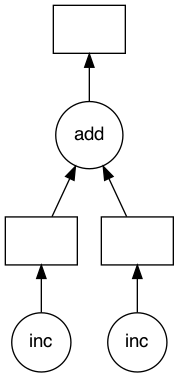

In [52]:
# Look at the task graph for `z`
z.visualize()

# 다시 한번 이번에는 for문에서 

In [147]:
def inc(x):
    sleep(1)
    return x + 1

def dec(x):
    sleep(1)
    return x - 1

def add(x, y):
    sleep(1)
    return x + y

In [148]:
%%timeit
l = []

for i in range(10):
    a = inc(i)
    b = dec(i)
    c = add(a, b)
    l.append(c)

30.1 s ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [105]:
l

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

In [ ]:
# l = []

# for i in range(10):
#     a = delayed(inc)(i)
#     b = delayed(dec)(i)
#     c = delayed(add)(a, b)
#     l.append(c)

In [140]:
@dask.delayed
def inc(x):
    sleep(1)
    return x + 1

@dask.delayed
def dec(x):
    sleep(1)
    return x - 1

@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

In [139]:
%%timeit
l = []

for i in range(10):
    a = inc(i)
    b = dec(i)
    c = add(a, b)
    l.append(c)

# l = [i.compute() for i in l]
# l = dask.compute(*l)

390 µs ± 3.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [146]:
dask.visualize(*l)

In [ ]:
# gpu가 있다면 cudf 